# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


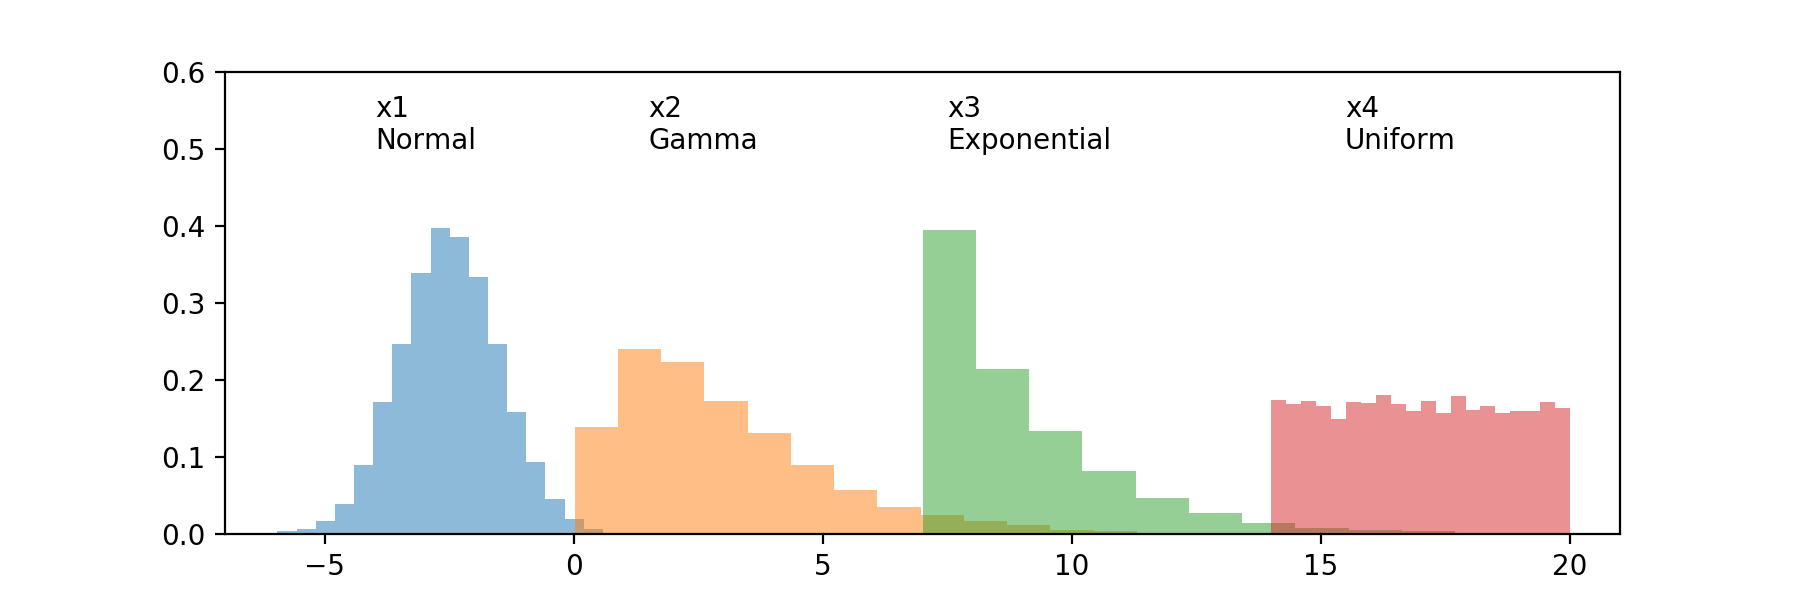

In [40]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


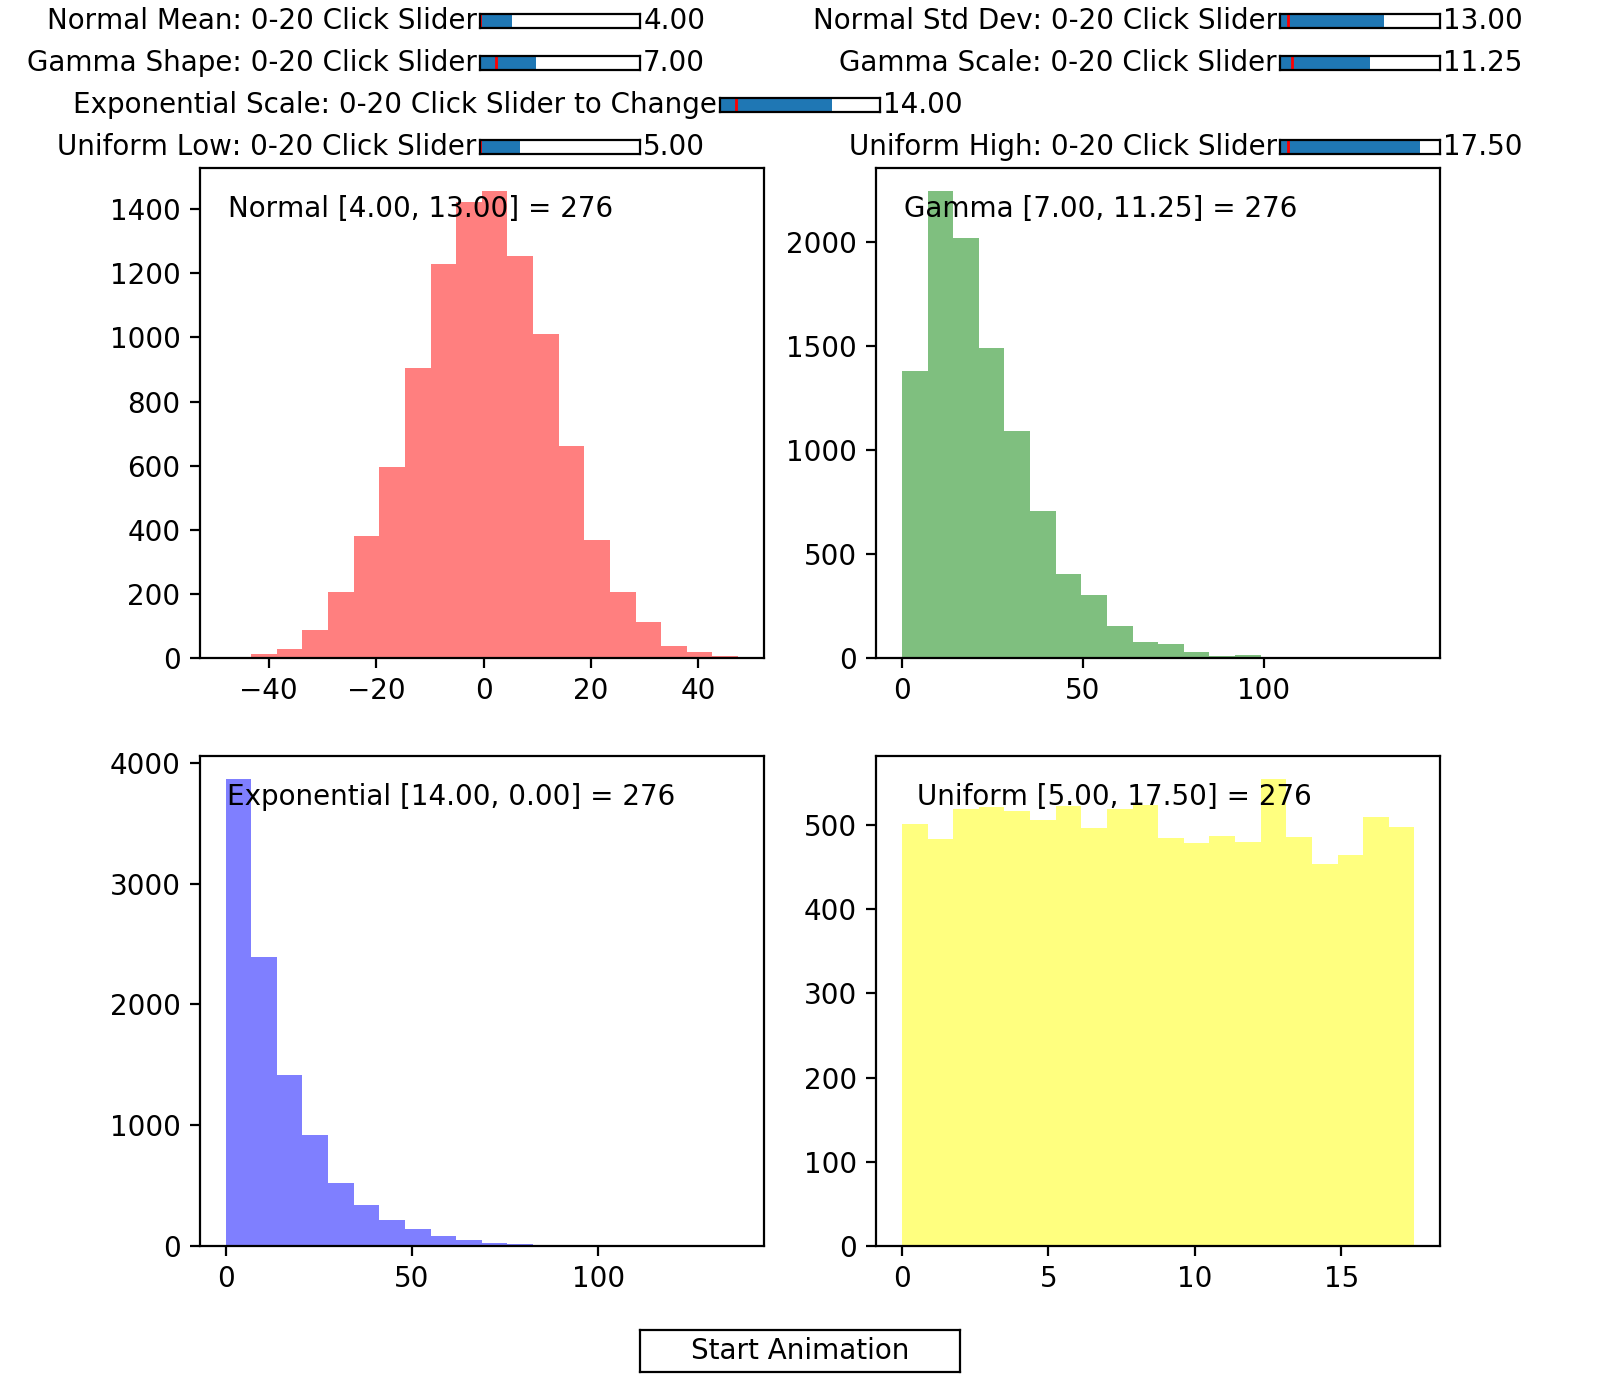

(0.0, 1.0)
(0.0, 1.0)


0

In [22]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Button, Slider
import numpy as np

n = 10000
refresh_interval_millisecond = 100

# create a 2x2 grid of subplots with default values for each distribution.
# Default values are for corresponding slider also.
normal_mean = 0.0
normal_std = 1.0
x1 = np.random.normal(normal_mean, normal_std, n)

gamma_shape = 2.0
gamma_scale = 1.5
x2 = np.random.gamma(gamma_shape, gamma_scale, n)

exponential_scale = 2.0
x3 = np.random.exponential(exponential_scale, n)

uniform_low = 0.0
uniform_high = 1.0
x4 = np.random.uniform(uniform_low, uniform_high, n)

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(8,7))
#fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2)
axs = [[ax1, x1, 'red', 'Normal', x1.mean(), normal_mean, normal_std],
       [ax2, x2, 'green', 'Gamma', x2.mean(), gamma_shape, gamma_scale],
       [ax3, x3, 'blue', 'Exponential', x3.mean(), exponential_scale, 0.0],
       [ax4, x4, 'yellow', 'Uniform', x4.mean(), uniform_low, uniform_high]]

#plt.gca().set_ylim(top=100)
print(plt.gca().get_ylim())
print(plt.gca().get_xlim())

def update_animation(frame):
    if frame == 100:
        a.event_source.stop()
    else:
        for ax,x,color,name,mean,param1,param2 in axs: 
            ax.cla()
            ax.hist(x[:frame*100], bins=20, alpha=0.5, color=color)
            bottom, top = ax.get_ylim()
            ax.text(x.min() + 0.5, 0.9*top, f'{name} [{param1:.2f}, {param2:.2f}] = {frame}')
            #ax.text(x.min() + 0.5, 0.9*top, '{} [{}, {}] = {}'.format(name, param1, param2, frame))

a = None
def start_animation(*args, **kwargs):
    print(axs)
    a = animation.FuncAnimation(fig, update_animation, interval=100)
    fig.canvas.draw() #redraw the figure


# Start Animation Button
ax_button = plt.axes([0.4, 0.02, 0.2, 0.03]) # xposition, yposition, width, height
start_button = Button(ax_button, 'Start Animation', color='white', hovercolor='grey')
start_button.on_clicked(start_animation)

# Normal Distribution Mean: Slider(0-20)
ax_normal_mean_slider = plt.axes([0.3, 0.98, 0.1, 0.01]) # xposition, yposition, width, height
normal_mean_slider = Slider(ax_normal_mean_slider, 'Normal Mean: 0-20 Click Slider', 0.0, 20.0, normal_mean)
def update_normal_mean_slider(val):
    normal_mean = val
    axs[0][1] = np.random.normal(normal_mean, normal_std, n)
    axs[0][5] = normal_mean
normal_mean_slider.on_changed(update_normal_mean_slider)
    
# Normal Distribution Std Dev: Slider(0-20)
ax_normal_std_slider = plt.axes([0.8, 0.98, 0.1, 0.01])
normal_std_slider = Slider(ax_normal_std_slider, 'Normal Std Dev: 0-20 Click Slider', 0.0, 20.0, normal_std)
def update_normal_std_slider(val):
    normal_std = val
    axs[0][1] = np.random.normal(normal_mean, normal_std, n)
    axs[0][6] = normal_std
normal_std_slider.on_changed(update_normal_std_slider)

# Gamma Distribution Shape: Slider(0-20)
ax_gamma_shape_slider = plt.axes([0.3, 0.95, 0.1, 0.01]) # xposition, yposition, width, height
gamma_shape_slider = Slider(ax_gamma_shape_slider, 'Gamma Shape: 0-20 Click Slider', 0.0, 20.0, gamma_shape)
def update_gamma_shape_slider(val):
    gamma_shape = val
    axs[1][1] = np.random.gamma(gamma_shape, gamma_scale, n)
    axs[1][5] = gamma_shape
gamma_shape_slider.on_changed(update_gamma_shape_slider)

# Gamma Distribution Std Dev: Slider(0-20)
ax_gamma_scale_slider = plt.axes([0.8, 0.95, 0.1, 0.01]) # xposition, yposition, width, height
gamma_scale_slider = Slider(ax_gamma_scale_slider, 'Gamma Scale: 0-20 Click Slider', 0.0, 20.0, gamma_scale)
def update_gamma_scale_slider(val):
    gamma_scale = val
    axs[1][1] = np.random.gamma(gamma_shape, gamma_scale, n)
    axs[1][6] = gamma_scale
gamma_scale_slider.on_changed(update_gamma_scale_slider)

# Exponential Distribution Scale: Slider(0-20)
ax_expo_scale_slider = plt.axes([0.45, 0.92, 0.1, 0.01]) # xposition, yposition, width, height
expo_scale_slider = Slider(ax_expo_scale_slider, 'Exponential Scale: 0-20 Click Slider to Change', 0.0, 20.0, exponential_scale)
def update_expo_scale_slider(val):
    exponential_scale = val
    axs[2][1] = np.random.exponential(exponential_scale, n)
    axs[2][5] = exponential_scale
expo_scale_slider.on_changed(update_expo_scale_slider)

# Uniform Distribution Low: Slider(0-20)
ax_uniform_low_slider = plt.axes([0.3, 0.89, 0.1, 0.01]) # xposition, yposition, width, height
uniform_low_slider = Slider(ax_uniform_low_slider, 'Uniform Low: 0-20 Click Slider', 0.0, 20.0, uniform_low)
def update_uniform_low_slider(val):
    uniform_low = val
    axs[3][1] = np.random.uniform(uniform_low, uniform_high, n)
    axs[3][5] = uniform_low
uniform_low_slider.on_changed(update_uniform_low_slider)
    
# Uniform Distribution High: Slider(0-20)
ax_uniform_high_slider = plt.axes([0.8, 0.89, 0.1, 0.01]) # xposition, yposition, width, height
uniform_high_slider = Slider(ax_uniform_high_slider, 'Uniform High: 0-20 Click Slider', 0.0, 20.0, uniform_high)
def update_uniform_high_slider(val):
    uniform_high = val
    axs[3][1] = np.random.uniform(uniform_low, uniform_high, n)
    axs[3][6] = uniform_high
uniform_high_slider.on_changed(update_uniform_high_slider)
